<a href="https://colab.research.google.com/github/chaitanyaa1512/Afame-Technologies/blob/main/HR_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #to work with arrays
import pandas as pd #to work with data frame
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
%matplotlib inline

In [3]:
from google.colab import files
upload= files.upload

In [4]:
df= pd.read_csv('/content/sample_data/HR Data.csv')

In [5]:
df.shape

(1470, 35)

In [6]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#drop unrelated/blank data
df.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)


In [9]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,3,2,2,17,3,2,7,7,7,7


In [10]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
pd.isnull(df).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,3,2,2,17,3,2,7,7,7,7


In [14]:
#change data type
df['Age']=df['Age'].astype('float')

In [15]:
df['Age'].dtypes

dtype('float64')

In [16]:
#change data type
df['Age']=df['Age'].astype('int')

In [17]:
df['Age'].dtypes

dtype('int64')

In [18]:
#identify columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
df.rename(columns={'Department':'Dept'})

,Age,Attrition,BusinessTravel,DailyRate,Dept,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
#describe for sepcific columns
df[['Age','DistanceFromHome','HourlyRate','YearsAtCompany']].describe()

,Age,DistanceFromHome,HourlyRate,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,65.891156,7.008163
std,9.135373,8.106864,20.329428,6.126525
min,18.000000,1.000000,30.000000,0.000000
25%,30.000000,2.000000,48.000000,3.000000
50%,36.000000,7.000000,66.000000,5.000000
75%,43.000000,14.000000,83.750000,9.000000
max,60.000000,29.000000,100.000000,40.000000


**Exploartory** **Data** **Analysis**

**Gender**


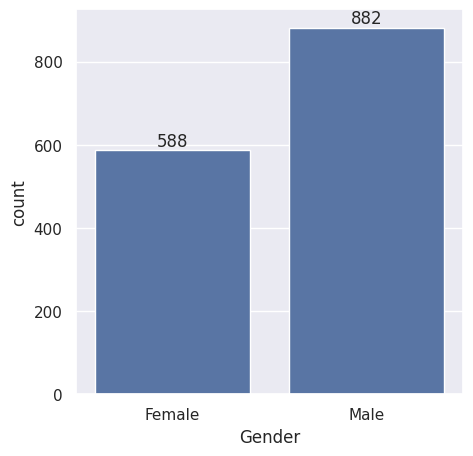

In [64]:
sns.set (rc={'figure.figsize':(5,5)})
ax=sns.countplot(x='Gender',data=df)
#to mark labels
for bars in ax.containers:
  ax.bar_label(bars)

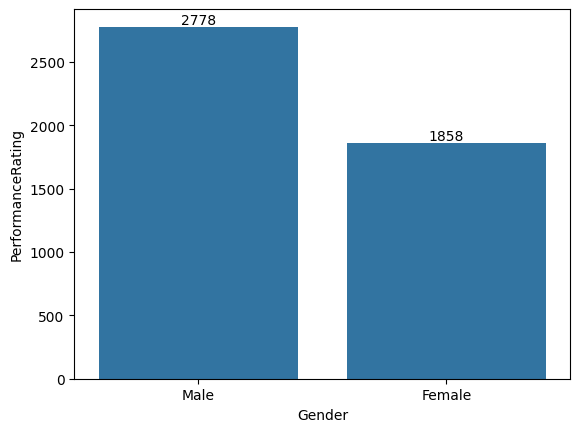

In [23]:
#Gender wise Performance
perform_gen=df.groupby(['Gender'],as_index=False)['PerformanceRating'].sum().sort_values (by='PerformanceRating',ascending=False)
bx=sns.barplot(x='Gender', y='PerformanceRating', data=perform_gen)
for bars in bx.containers:
  bx.bar_label(bars)


The above plots reveal a higher proportion of Male employees alongside superior performance ratings as compared to Female employees.

In [24]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the HR data with an 'Age' column
# Replace 'df' with the actual name of your DataFrame if different

# Define the age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # You can adjust the age groups as needed
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'AgeGroup' based on the defined age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check the updated DataFrame with the new 'AgeGroup' column
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StockOptionLevel  \
0                        2  ...                        1                 0   
1       

**Age**

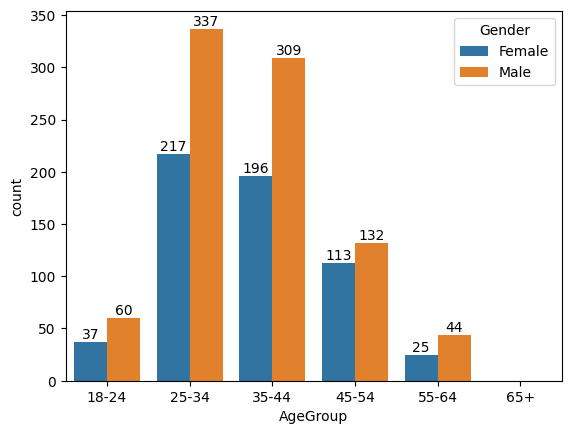

In [25]:
ax=sns.countplot(x='AgeGroup', hue='Gender', data=df)
for bars in ax.containers:
  ax.bar_label(bars)


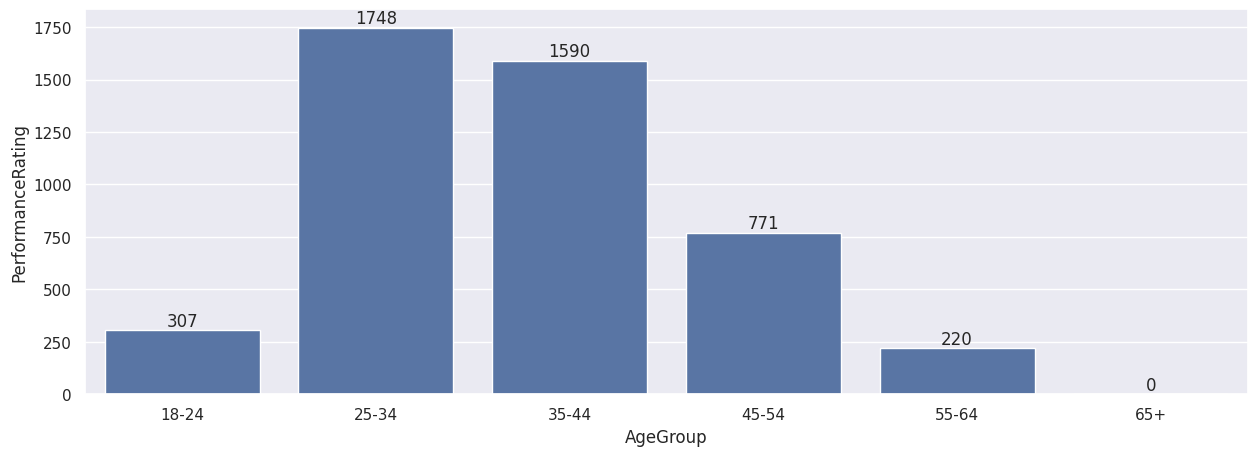

In [55]:
#Age wise Performance
perform_age=df.groupby(['AgeGroup'],as_index=False)['PerformanceRating'].sum().sort_values (by='PerformanceRating',ascending=False)
bx=sns.barplot(x='AgeGroup', y='PerformanceRating', data=perform_age)
for bars in bx.containers:
  bx.bar_label(bars)

From the above graphs we can interpret that the top job performers are males between 25-34 age.

**Department**

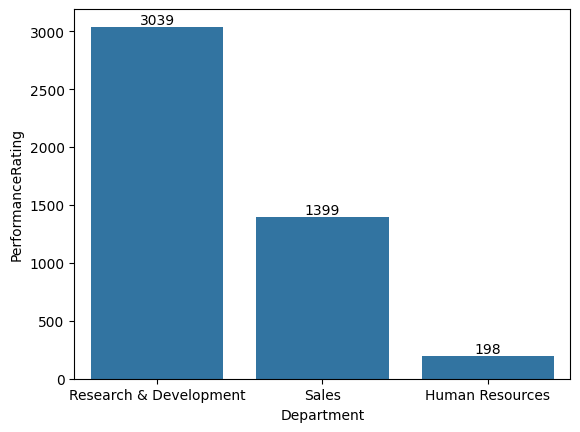

In [27]:
#Dept wise performance
perform_dept= df.groupby(['Department'],as_index=False)['PerformanceRating'].sum().sort_values (by='PerformanceRating',ascending=False)
bx=sns.barplot(x='Department', y='PerformanceRating', data=perform_dept)
for bars in bx.containers:
  bx.bar_label(bars)

**Job** **Role**

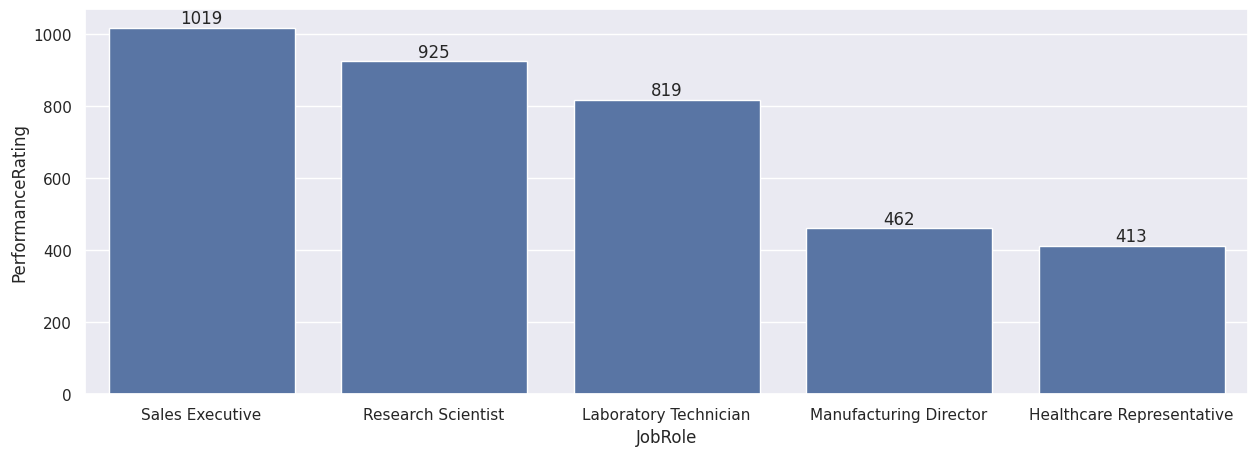

In [28]:
#JobRole wise performance
perform_job= df.groupby(['JobRole'],as_index=False)['PerformanceRating'].sum().sort_values (by='PerformanceRating',ascending=False).head(5)

sns.set (rc={'figure.figsize':(15,5)})
bx=sns.barplot(x='JobRole', y='PerformanceRating', data=perform_job)
for bars in bx.containers:
  bx.bar_label(bars)

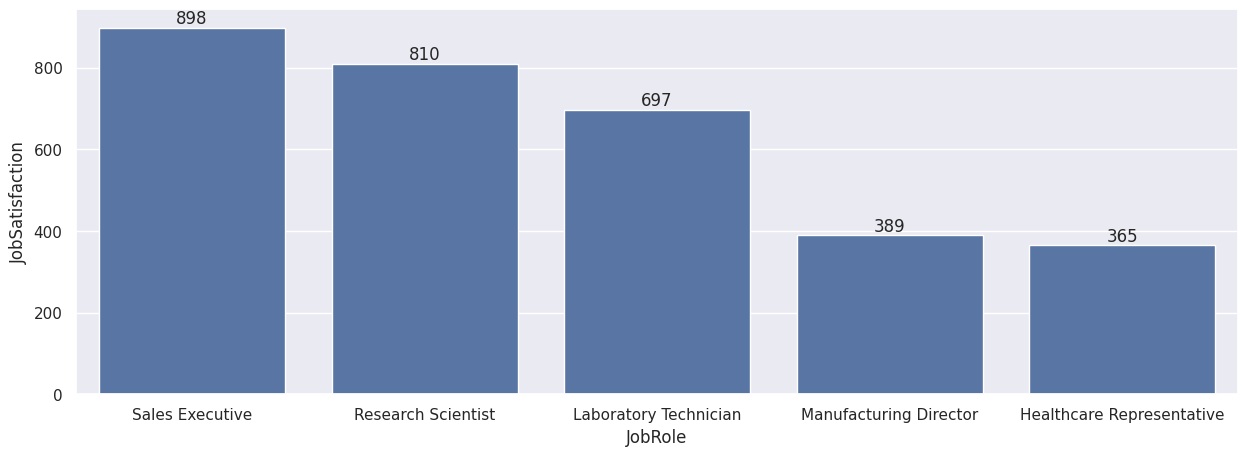

In [29]:
#JobRole wise Satisfaction
perform_job= df.groupby(['JobRole'],as_index=False)['JobSatisfaction'].sum().sort_values (by='JobSatisfaction',ascending=False).head(5)

sns.set (rc={'figure.figsize':(15,5)})
bx=sns.barplot(x='JobRole', y='JobSatisfaction', data=perform_job)
for bars in bx.containers:
  bx.bar_label(bars)

From the above graphs we derive that Sales Exceutive, Research Scientist, Laboratory Technician exhibit higher performance as well as job satisfaction metrics

**Marrital** **Status**

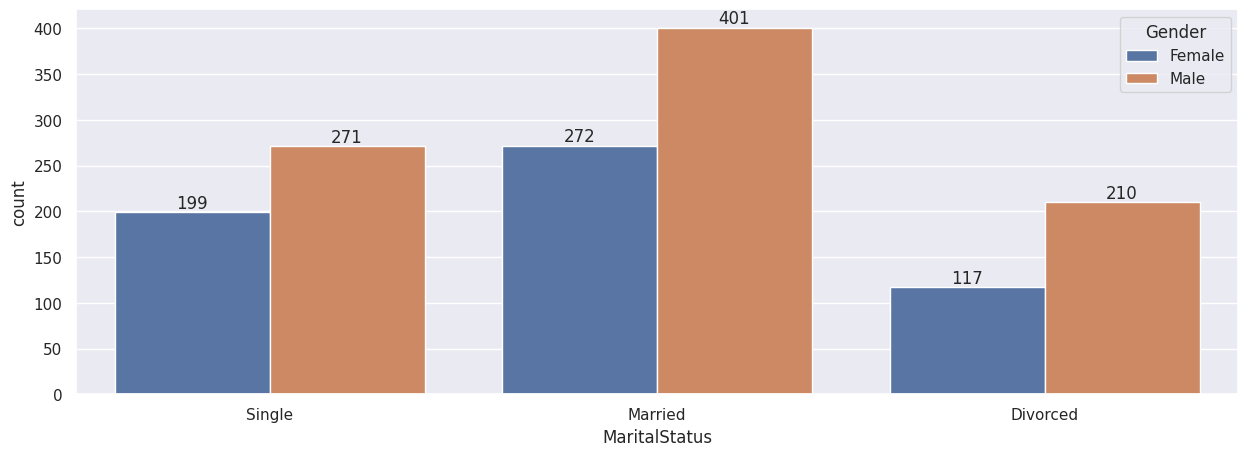

In [30]:
ax=sns.countplot(x='MaritalStatus', hue='Gender', data=df)
sns.set (rc={'figure.figsize':(7,5)})
for bars in ax.containers:
  ax.bar_label(bars)


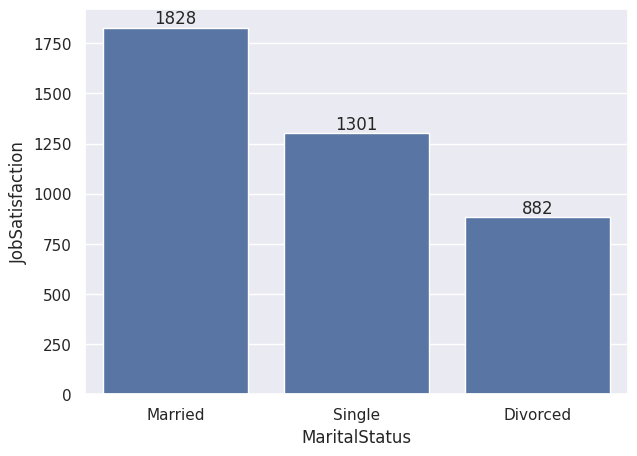

In [34]:
perform_status= df.groupby(['MaritalStatus'],as_index=False)['JobSatisfaction'].sum().sort_values (by='JobSatisfaction',ascending=False)

sns.set (rc={'figure.figsize':(7,5)})
bx=sns.barplot(x='MaritalStatus', y='JobSatisfaction', data=perform_status)
for bars in bx.containers:
  bx.bar_label(bars)

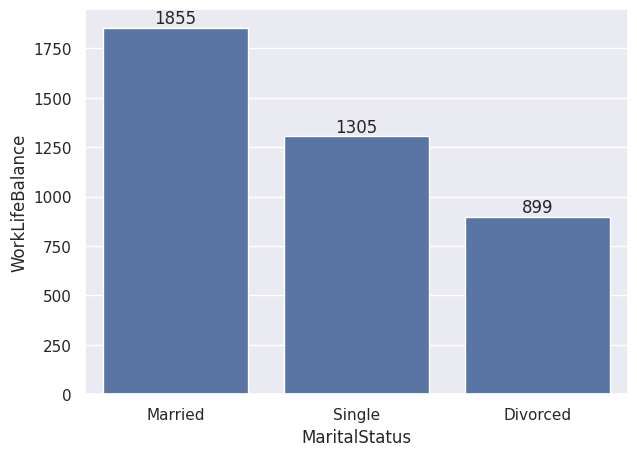

In [36]:
#work life balance based on marital status
bal_status= df.groupby(['MaritalStatus'],as_index=False)['WorkLifeBalance'].sum().sort_values (by='WorkLifeBalance',ascending=False)

sns.set (rc={'figure.figsize':(7,5)})
bx=sns.barplot(x='MaritalStatus', y='WorkLifeBalance', data=bal_status)
for bars in bx.containers:
  bx.bar_label(bars)

The above graphs imply that Married Males dominate the total job satisfaction & work life balance metrics.

Income based on Age & Gender

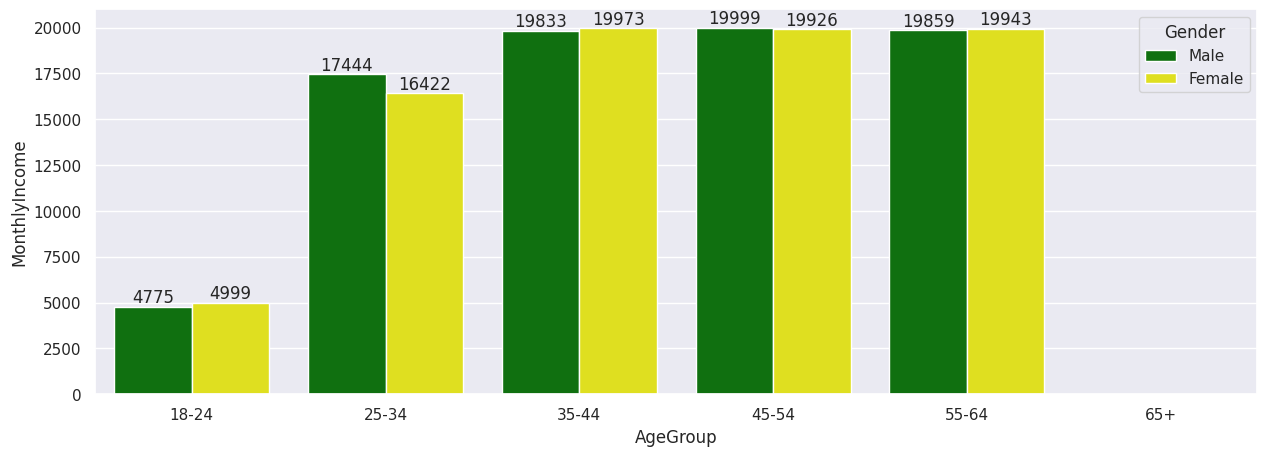

In [52]:
income_age= df.groupby(['AgeGroup', 'Gender'], as_index= False)['MonthlyIncome'].max().sort_values(by='MonthlyIncome', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
custom_palette = {'Male': 'green', 'Female': 'yellow'}
bx=sns.barplot(x='AgeGroup', hue= 'Gender', y='MonthlyIncome', data=income_age, palette=custom_palette)
for bars in bx.containers:
  bx.bar_label(bars)

 *Analysis of the graph indicates consistent monthly salary ranges across the age groups 35-44, 45-54, and 55-64 for both genders, with the 45-54 age group emerging as the highest salary earner*.

**Conclusion**

***An analysis of our data suggests that married males aged 45-54, who demonstrate higher performance ratings and job satisfaction levels within the roles of Sales Executive, Research Scientist, and Laboratory Technician. Furthermore, this cohort commands the highest salaries within these positions, suggesting a correlation between marital status, age, job role, and professional success.***